In [1]:
!wget -c https://git.wmi.amu.edu.pl/s434695/ium_434695/raw/commit/2301fb86e434734376f73503307a8f3255a75cc6/vgsales.csv


/bin/sh: 1: wget: not found


In [13]:
!pip install --user pandas
!pip install --user scikit-learn
!pip install --user matplotlib
!pip install --user seaborn

     |████████████████████████████████| 286kB 1.1MB/s eta 0:00:01


In [3]:
import pandas as pd
vgsales = pd.read_csv('vgsales.csv')
vgsales

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [4]:
vgsales.describe(include='all')

Rank                         Name Platform          Year  \
count   16598.000000                        16598    16598  16327.000000   
unique           NaN                        11493       31           NaN   
top              NaN  Need for Speed: Most Wanted       DS           NaN   
freq             NaN                           12     2163           NaN   
mean     8300.605254                          NaN      NaN   2006.406443   
std      4791.853933                          NaN      NaN      5.828981   
min         1.000000                          NaN      NaN   1980.000000   
25%      4151.250000                          NaN      NaN   2003.000000   
50%      8300.500000                          NaN      NaN   2007.000000   
75%     12449.750000                          NaN      NaN   2010.000000   
max     16600.000000                          NaN      NaN   2020.000000   

         Genre        Publisher      NA_Sales      EU_Sales      JP_Sales  \
count    16598            16540  16598.000000  16598.000000  16598.000000   
unique      12              578           NaN           NaN           NaN   
top     Action  Electronic Arts           NaN           NaN           NaN   
freq      3316             1351           NaN           NaN           NaN   
mean       NaN              NaN      0.264667      0.146652      0.077782   
std        NaN              NaN      0.816683      0.505351      0.309291   
min        NaN              NaN      0.000000      0.000000      0.000000   
25%        NaN              NaN      0.000000      0.000000      0.000000   
50%        NaN              NaN      0.080000      0.020000      0.000000   
75%        NaN              NaN      0.240000      0.110000      0.040000   
max        NaN              NaN     41.490000     29.020000     10.220000   

         Other_Sales  Global_Sales  
count   16598.000000  16598.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean        0.048063      0.537441  
std         0.188588      1.555028  
min         0.000000      0.010000  
25%         0.000000      0.060000  
50%         0.010000      0.170000  
75%         0.040000      0.470000  
max        10.570000     82.740000

In [5]:
vgsales["Publisher"].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Phantagram                         1
989 Sports                         1
Illusion Softworks                 1
TYO                                1
General Entertainment              1
Name: Publisher, Length: 578, dtype: int64

In [6]:
vgsales["Platform"].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<AxesSubplot:>

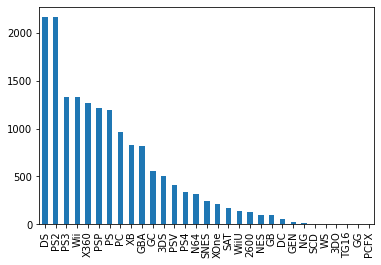

In [10]:
vgsales["Platform"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Platform'>

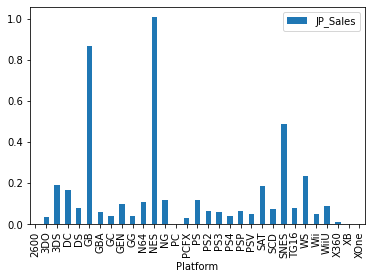

In [11]:
vgsales[["Platform","JP_Sales"]].groupby("Platform").mean().plot(kind="bar")

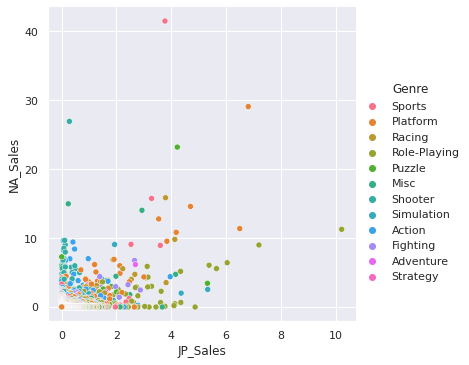

In [14]:
import seaborn as sns
sns.set_theme()
sns.relplot(data=vgsales, x="JP_Sales", y="NA_Sales", hue="Genre")

In [17]:
from sklearn.model_selection import train_test_split
vgsales_train, vgsales_test = train_test_split(vgsales, test_size = 0.6, random_state = 1)
vgsales_train["Platform"].value_counts()

PS2     873
DS      829
Wii     530
X360    507
PSP     503
PS3     488
PS      471
PC      396
XB      339
GBA     337
GC      237
3DS     205
PSV     166
PS4     143
N64     126
XOne     95
SNES     95
SAT      65
WiiU     55
2600     49
NES      43
GB       38
DC       25
GEN      10
NG        8
3DO       2
WS        2
GG        1
SCD       1
Name: Platform, dtype: int64

In [18]:
vgsales_test["Platform"].value_counts()

DS      1334
PS2     1288
PS3      841
Wii      795
X360     758
PS       725
PSP      710
PC       564
XB       485
GBA      485
GC       319
3DS      304
PSV      247
PS4      193
N64      193
SNES     144
XOne     118
SAT      108
WiiU      88
2600      84
GB        60
NES       55
DC        27
GEN       17
SCD        5
NG         4
WS         4
TG16       2
3DO        1
PCFX       1
Name: Platform, dtype: int64